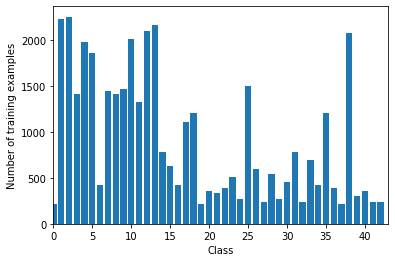

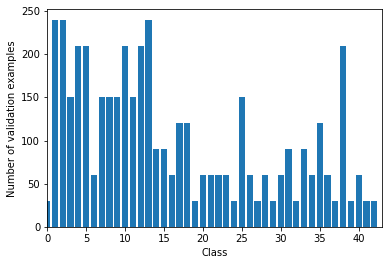

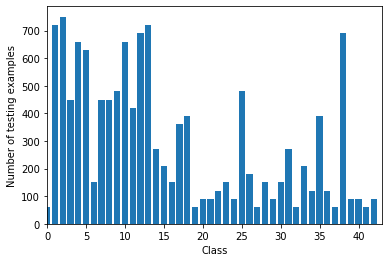

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Number of validation examples= 4410
Training...

EPOCH 1 ...
Validation Accuracy = 0.309

EPOCH 2 ...
Validation Accuracy = 0.497

EPOCH 3 ...
Validation Accuracy = 0.598

EPOCH 4 ...
Validation Accuracy = 0.675

EPOCH 5 ...
Validation Accuracy = 0.718

EPOCH 6 ...
Validation Accuracy = 0.766

EPOCH 7 ...
Validation Accuracy = 0.795

EPOCH 8 ...
Validation Accuracy = 0.811

EPOCH 9 ...
Validation Accuracy = 0.823

EPOCH 10 ...
Validation Accuracy = 0.828

EPOCH 11 ...
Validation Accuracy = 0.844

EPOCH 12 ...
Validation Accuracy = 0.854

EPOCH 13 ...
Validation Accuracy = 0.856

EPOCH 14 ...
Validation Accuracy = 0.864

EPOCH 15 ...
Validation Accuracy = 0.880

EPOCH 16 ...
Validation Accuracy = 0.883

EPOCH 17 ...
Validation Accuracy = 0.880

EPOCH 18 ...
Validation Accuracy = 0.888

EPOCH 19 ...
Validation Accuracy = 0.893

EPOCH 20 ...
Validation Accuracy = 0.892

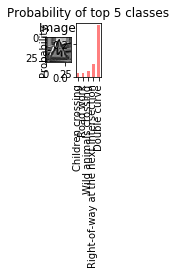

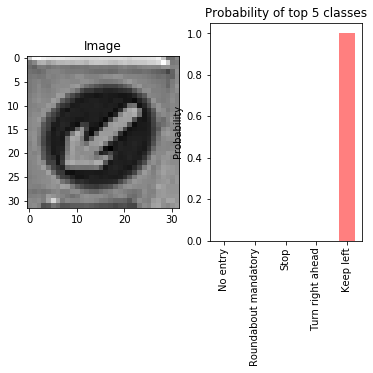

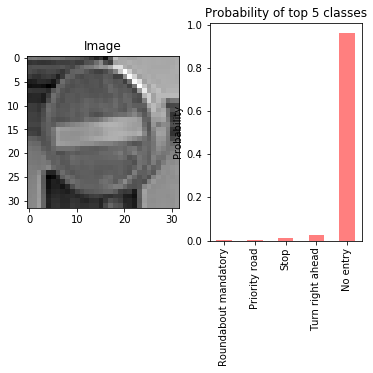

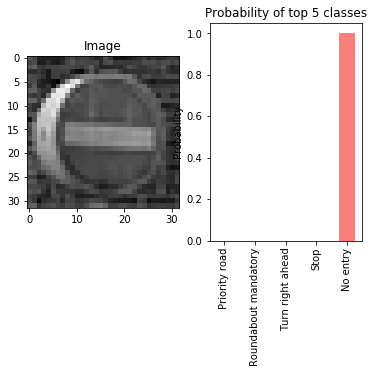

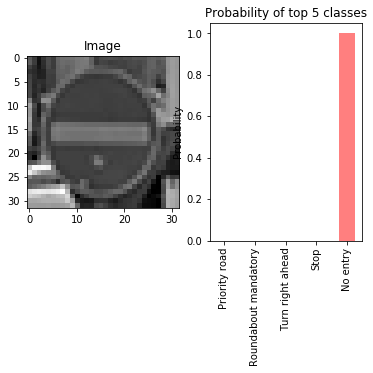

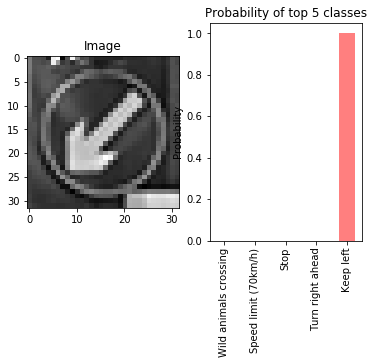

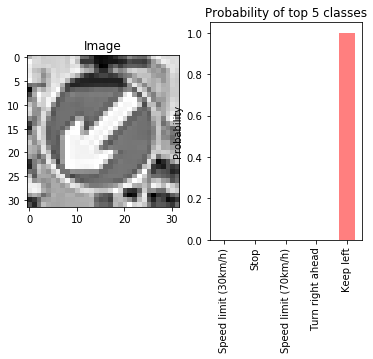

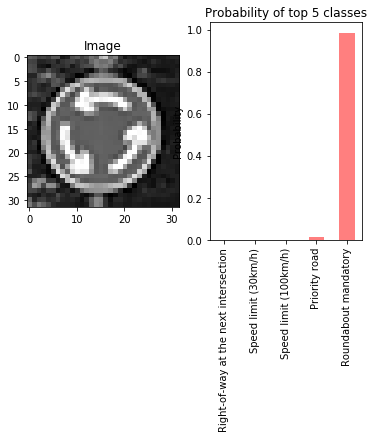

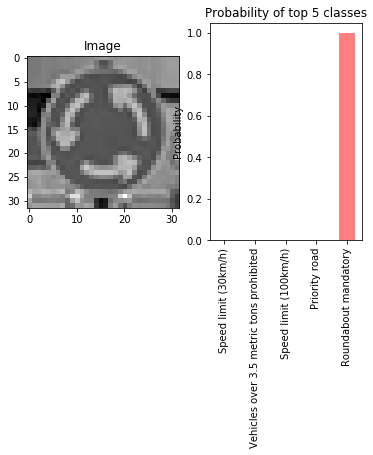

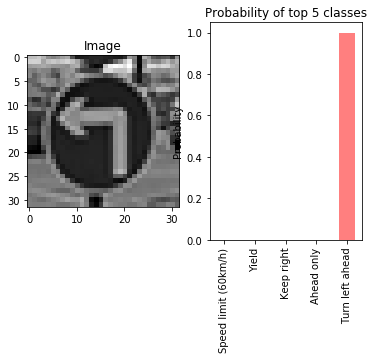

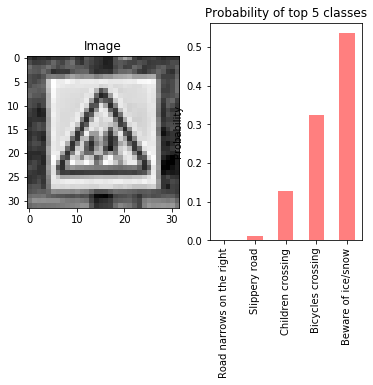

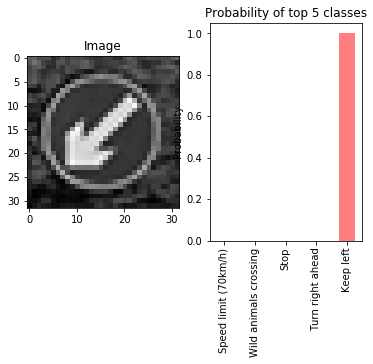

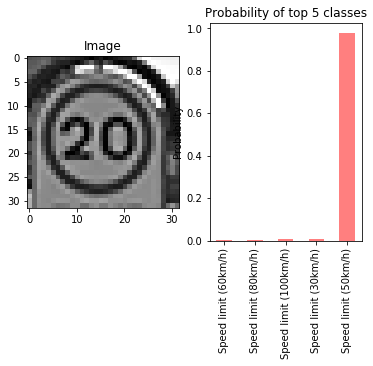

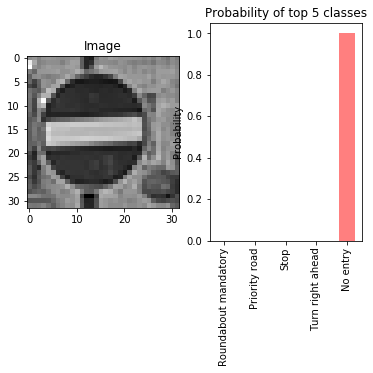

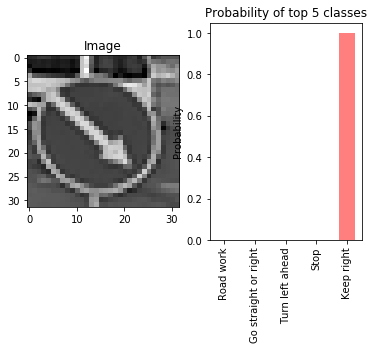

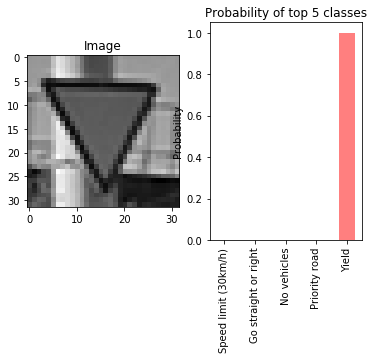

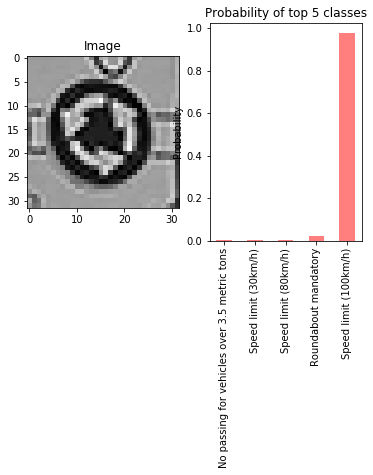

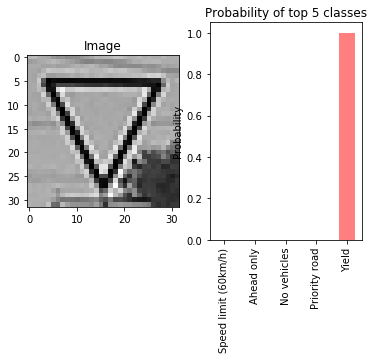

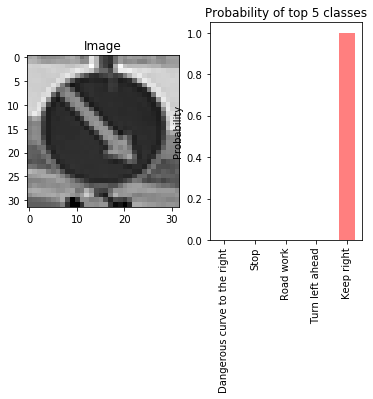

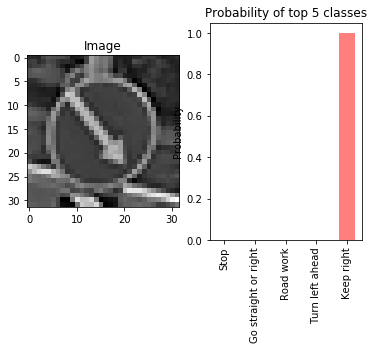

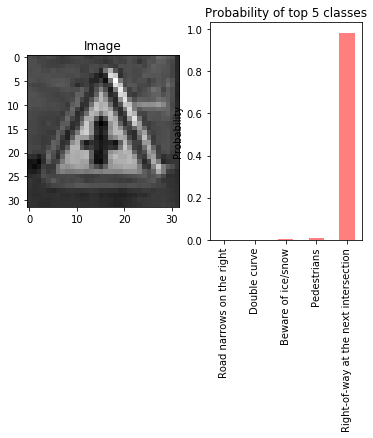

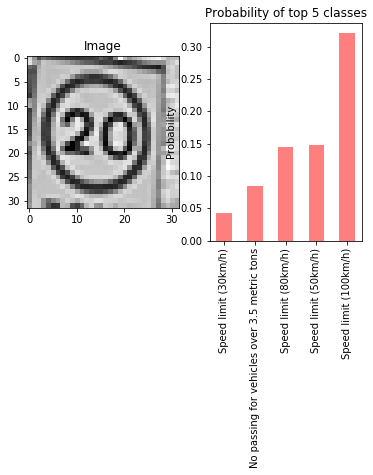

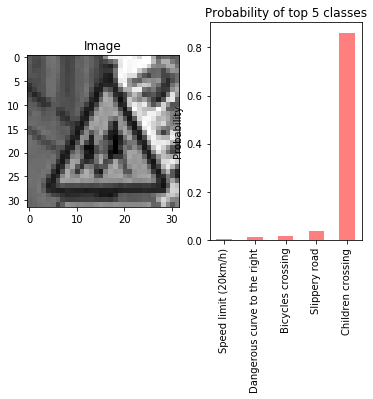

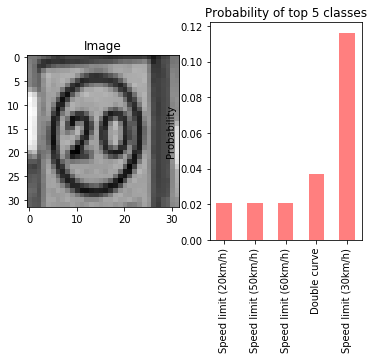

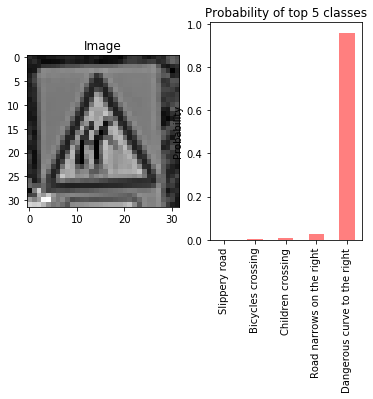

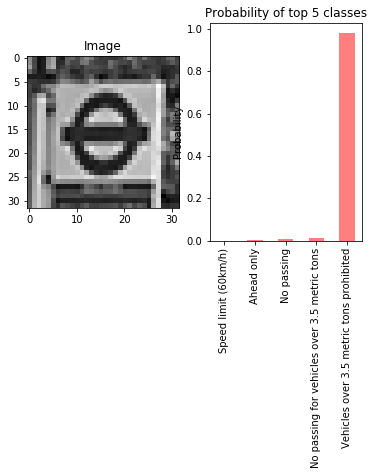

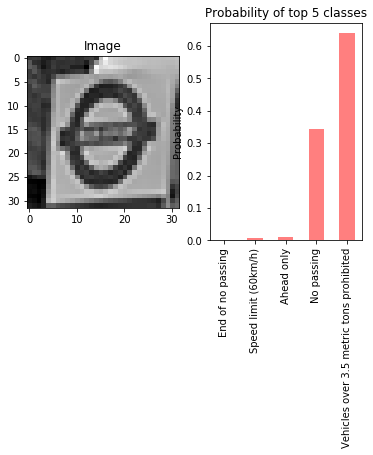

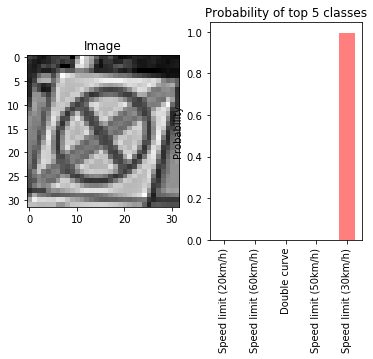

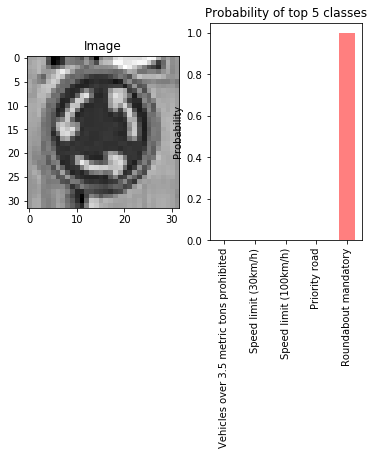

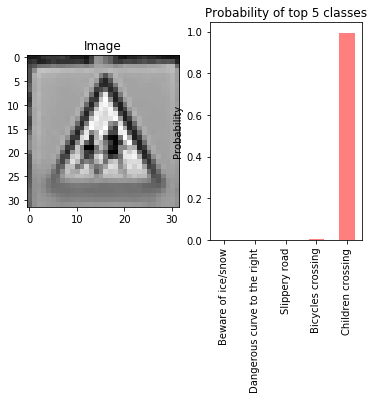

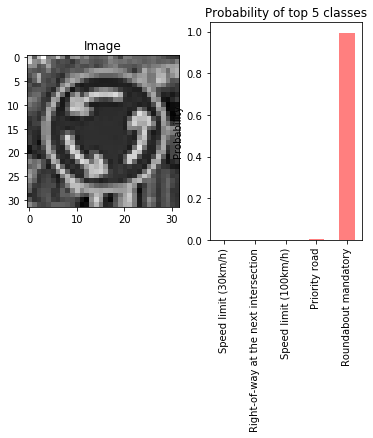

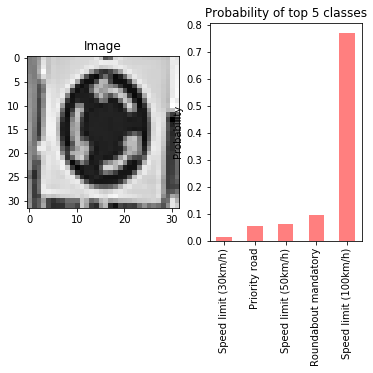

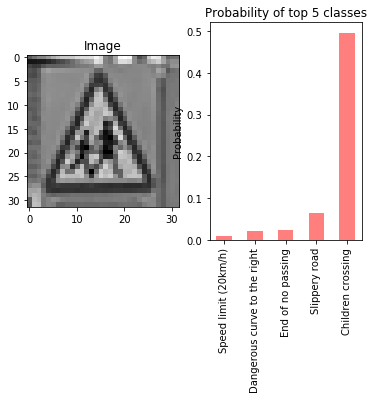

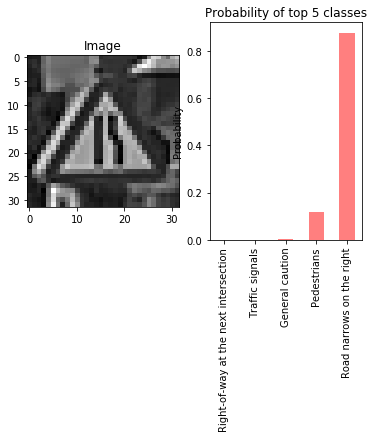

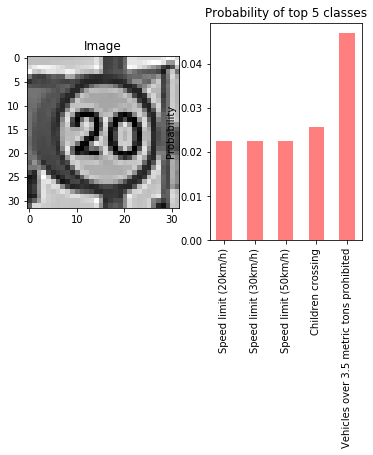

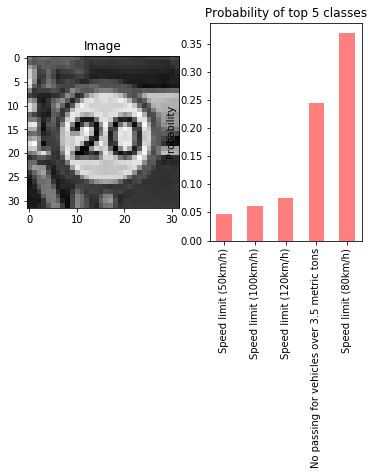

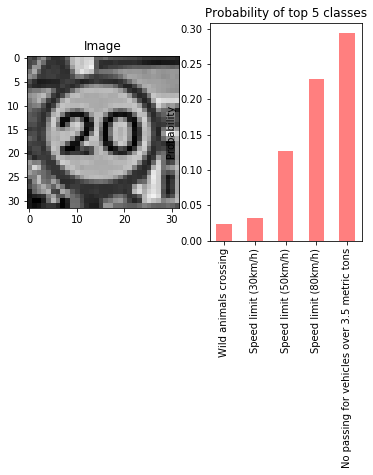

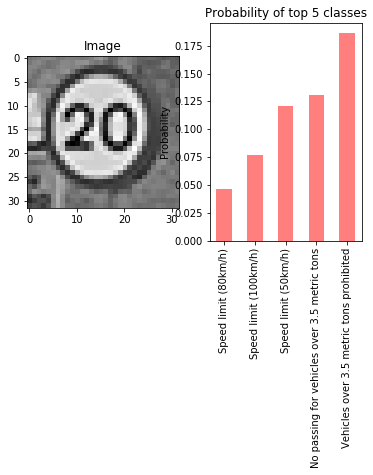

In [3]:

#step 0:

# Load pickled data
import pickle


#load datasets
training_file="C:/Users/Nikhil Gundala/Desktop/Review 3/modules/Traffic Sign Classification/train.p"
validation_file="C:/Users/Nikhil Gundala/Desktop/Review 3/modules/Traffic Sign Classification/valid.p"
testing_file = "C:/Users/Nikhil Gundala/Desktop/Review 3/modules/Traffic Sign Classification/test.p"

#de pickle the datasets
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


#step 1:

import numpy as np
from matplotlib import pyplot

n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_train[0].shape[:-1]

n_classes = len(set(y_train))
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([0, 43])
pyplot.show()
n_classes = len(set(y_valid))
sign_classes, class_indices, class_counts = np.unique(y_valid, return_index = True, return_counts = True)

pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of validation examples')
pyplot.xlim([0, 43])
pyplot.show()

n_classes = len(set(y_test))
sign_classes, class_indices, class_counts = np.unique(y_test, return_index = True, return_counts = True)
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of testing examples')
pyplot.xlim([0, 43])
pyplot.show()

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of validation examples=",n_validation)





#step 1:

#Pre-process the Data Set (normalization, grayscale, etc.)

# Minimally, the image data should be normalized so that the data has mean zero and equal variance. 
#For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 
### The data is scalled from 0 to 1 
import random
import numpy as np
import matplotlib.pyplot as plt


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import shuffle
from skimage import exposure

def preprocess_dataset(X, y = None):
    #print(X.shape)
    #Convert to grayscale, e.g. single Y channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y
X_test, y_test = preprocess_dataset(X_test,y_test)
X,y = X_train,y_train
X_train,y_train = preprocess_dataset(X_train,y_train)
#print(X_train.shape)
X_train, y_train = shuffle(X_train, y_train)
#X_train = (X_train -128)/128
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20)







#step 3:bulding architecture

import tensorflow as tf
#from tensorflow.python.compiler.tensorrt import trt_convert as trt

EPOCHS = 20
BATCH_SIZE = 128
dropout1 = 0.90 
dropout2 = 0.80
dropout3 = 0.70
dropout4 = 0.50
from tensorflow.contrib.layers import flatten
mu = 0
sigma = 0.1

# Define functions for network
#layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
#layer1_biases = tf.Variable(tf.zeros([depth]))

layer1_weight = tf.Variable(tf.truncated_normal([5, 5, 1, 6],mean = mu,stddev=sigma))
layer1_bias = tf.Variable(tf.zeros(6))
layer2_weight = tf.Variable(tf.truncated_normal([5, 5, 6, 16],mean = mu,stddev=sigma))
layer2_bias = tf.Variable(tf.zeros(16))
flat_weight = tf.Variable(tf.truncated_normal([400, 120],mean = mu,stddev=sigma))
bias_flat  =  tf.Variable(tf.zeros(120))
flat_weight2 = tf.Variable(tf.truncated_normal([120, 84],mean = mu,stddev=sigma))
bias_flat2 =   tf.Variable(tf.zeros(84))
flat_weight3 = tf.Variable(tf.truncated_normal([84, 43],mean = mu,stddev=sigma))
bias_flat3 =   tf.Variable(tf.zeros(43))



def LeNet(x,train=True):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

 #First Convolutional Layer.Input = 32x32x1. Output = 28x28x6.
    x =   tf.nn.conv2d(x, layer1_weight, strides=[1, 1, 1, 1], padding='VALID')
    x =   tf.nn.bias_add(x, layer1_bias)

    # Activation
    x =   tf.nn.relu(x)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME')
    if(train):
        x = tf.nn.dropout(x, dropout1)
        
 #second Convolutional Layer.Output = 10x10x16.
    x =   tf.nn.conv2d(x, layer2_weight, strides=[1, 1, 1, 1], padding='VALID')
    x =   tf.nn.bias_add(x, layer2_bias)
    x =   tf.nn.relu(x)
    conv2 = tf.nn.max_pool(x,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME')
    if(train):
        conv2 = tf.nn.dropout(conv2, dropout2)
 #third Convolutional Layer
    fc0   = flatten(conv2)
    fc1 = tf.add(tf.matmul(fc0, flat_weight),bias_flat)
    fc1 = tf.nn.relu(fc1)
    if(train):
        fc1 = tf.nn.dropout(fc1, dropout3)
        
  #Fourth Convolutional Layer  
    fc1 = tf.add(tf.matmul(fc1, flat_weight2),bias_flat2)
    fc1 = tf.nn.relu(fc1)
    if(train):
        fc1 = tf.nn.dropout(fc1, dropout4)
    fc1 = tf.add(tf.matmul(fc1, flat_weight3),bias_flat3)
    logits = tf.nn.relu(fc1)

    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
one_hot_y = tf.one_hot(y, 43)
rate = 0.001


#L2 Regularization
# Train The Model

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

training_operation = optimizer.minimize(loss_operation)
logits_2 = LeNet(x)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()
session = tf.Session()
session.run(tf.global_variables_initializer())


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")




#step 5:testing with images
    
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
from skimage import io
X_custom = np.empty([0, 32, 32, 3], dtype = np.int32)
for i in range(38):
    raw_path = "C:/Users/Nikhil Gundala/Desktop/Review 3/modules/Traffic Sign Classification/custom/"
    image = io.imread(raw_path + "example_{0:0>5}".format(i + 1) + '.png')
    X_custom = np.append(X_custom, [image[:, :, :3]], axis = 0)
y_custom = np.array([21,39,17,17,17,39,39,40,40,34,28,39,0,17,38,13,40,13,38,38,11,0,28,0,99,99,99,32,40,28,40,40,28,24,0,0,0,0])

X_custom,_ = preprocess_dataset(X_custom)
new_pred = tf.nn.softmax(LeNet(X_custom,False))


with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_preds = sess.run(new_pred, feed_dict={x:X_custom,y:y_custom})
    print(test_preds)
    top_k_predictions = tf.nn.top_k(test_preds, 5)
    print(top_k_predictions)

    
import pandas as pd

sign_names = pd.read_csv('signnames.csv')

def get_sign_name(class_index):
    row = sign_names[sign_names.ClassId == int(class_index)]
    return row.SignName.values[0]

def get_sign_names(indices):
    return [get_sign_name(index) for index in indices]
output = test_preds
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    session=sess
    for i, image in enumerate(X_custom):
        # Plot the original image
        plt.subplot(121);
        plt.imshow(image.reshape(image_shape[0], image_shape[1]),cmap='gray');
        plt.title('Image');

        # Get the top k probabilities and the classes to which they correspond
        top_k = tf.nn.top_k(output[i], k=5)
        indices = top_k.indices.eval(session=session)
        values = top_k.values.eval(session=session)

        # Sort in ascending order
        idx = values.argsort()
        values = values[idx]
        indices = indices[idx]

        # Show a bar chart of the probabilities
        y_pos = range(0, 200, 40)

        plt.subplot(122)
        plt.bar(y_pos, values, align='center', alpha=0.5, color='red', width=20)

        plt.xticks(y_pos, get_sign_names(indices))
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)

        plt.ylabel('Probability')
        plt.title('Probability of top 5 classes')
        plt.show()
    
